# Plot the distributions of ARTS simulations and ATMS data

In [2]:
import xarray
import numpy as np
import pandas as pd
from arts_output import arts_output
import matplotlib.pyplot as plt
import math

read arts simulation output as xarray

In [3]:
fileName_arts = '/home/inderpreet/Dendrite/Projects/AWS-325GHz/ATMS/simulations_1000.nc'
A = arts_output(fileName_arts)
BT = A.y_atms

Convert the stokes elements to polarised components  I_h = I-Q, I_v = I+Q ; 
and Quasihorizontal and Quasivertical componests wrt spacecraft velocity vector:
    H = I_v sin^2(\theta) + I_h cos^2(\theta)
    H = I_v cos^2(\theta) + I_h sin^2(\theta)
    

In [4]:
theta = math.radians(45.0)
theta_ind = 0
hist_arts = ()
H = ()
V = ()
for i in range(6):
    I = BT[:, theta_ind, i, 0]
    Q = BT[:, theta_ind, i, 1]
    I = I.where((I < 1e36) & (Q < 1e36), drop = True)
    Q = Q.where((Q < 1e36) & (Q < 1e36), drop = True)
    I_v = I + Q
    I_h = I - Q

    H += (I_v * np.sin(theta)**2 + I_h * np.cos(theta)**2,)
    V += (I_h * np.sin(theta)**2 + I_v * np.cos(theta)**2,)
H    

(<xarray.DataArray 'y_atms' (cases: 1000)>
 array([283.2646 , 288.65076, 281.32327, 269.32452, 282.73477, 287.2627 ,
        287.07288, 275.53012, 286.87488, 275.52393, 283.7085 , 280.0292 ,
        282.05804, 284.02997, 291.7331 , 282.15384, 279.07468, 283.3606 ,
        285.84973, 289.1851 , 281.84048, 281.70374, 283.19675, 278.46716,
        279.5411 , 284.3883 , 277.44174, 288.40433, 269.0973 , 284.31607,
        278.5124 , 277.1414 , 286.50952, 282.38638, 287.24432, 282.4313 ,
        287.05923, 278.83505, 285.24075, 280.8277 , 283.07834, 290.11087,
        276.9006 , 281.58292, 282.85345, 280.12988, 283.90298, 286.91782,
        283.81366, 280.9532 , 281.31195, 229.648  , 285.80743, 283.19162,
        284.6056 , 280.8791 , 290.2344 , 247.11264, 284.8299 , 278.171  ,
        285.9373 , 285.68573, 284.49408, 278.24854, 284.6503 , 276.96255,
        281.3783 , 279.68015, 285.63776, 287.6461 , 291.1033 , 285.56412,
        278.11145, 284.20346, 287.1831 , 287.89603, 286.61508, 285.34

read subset of ATMS data from the h5 file, the output is a pandas Dataframe `DF`

In [5]:
fileName_atms = '/home/inderpreet/ATMS/brightness_temp_zen.h5'
DF = pd.read_hdf(fileName_atms, 'DF')

calculate the distributions for ATMS data, for all 6 channels

In [6]:
bins =np.linspace(200, 300, 201)
#vza_lims = (0, 1)
vza_lims = (45, 46)
DF_vza = DF[(DF['vza'] < vza_lims[1]) & (DF['vza'] > vza_lims[0])]
hist1 = np.histogram(DF_vza['BT17'], bins, density = True)
hist2 = np.histogram(DF_vza['BT18'], bins, density = True)
hist3 = np.histogram(DF_vza['BT19'], bins, density = True)
hist4 = np.histogram(DF_vza['BT20'], bins, density = True)   
hist5 = np.histogram(DF_vza['BT21'], bins, density = True)
hist6 = np.histogram(DF_vza['BT22'], bins, density = True)

hist_atms = (hist1[0], hist2[0], hist3[0], hist4[0], hist5[0], hist6[0])
hist_atms

(array([0.00010283, 0.00010283, 0.00010283, 0.        , 0.00020567,
        0.00010283, 0.00041133, 0.00010283, 0.0003085 , 0.0003085 ,
        0.00041133, 0.0003085 , 0.        , 0.00041133, 0.0003085 ,
        0.00010283, 0.00020567, 0.0003085 , 0.00020567, 0.        ,
        0.00020567, 0.000617  , 0.00010283, 0.00041133, 0.0003085 ,
        0.00041133, 0.00071983, 0.        , 0.00010283, 0.0003085 ,
        0.00010283, 0.00041133, 0.00041133, 0.0003085 , 0.00020567,
        0.00041133, 0.00020567, 0.00020567, 0.00010283, 0.0003085 ,
        0.0003085 , 0.0003085 , 0.00010283, 0.00010283, 0.00051417,
        0.000617  , 0.00020567, 0.00041133, 0.00071983, 0.00051417,
        0.00071983, 0.0003085 , 0.00051417, 0.0003085 , 0.        ,
        0.00041133, 0.0003085 , 0.0003085 , 0.0003085 , 0.00020567,
        0.00041133, 0.00041133, 0.00010283, 0.00041133, 0.0003085 ,
        0.00020567, 0.00051417, 0.000617  , 0.0003085 , 0.00051417,
        0.00082266, 0.00051417, 0.00041133, 0.00

Calculate distributions for arts simulations, for all 6 channels

In [7]:
hist_arts = ()
for i in range(6):    
    hist = np.histogram(H[i], bins, density = True)
    hist_arts +=  (hist[0],)
hist_arts  

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00201613, 0.        , 0.        ,
        0.00201613, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00201613, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00201613,
        0.00201613, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

plot the distributions 

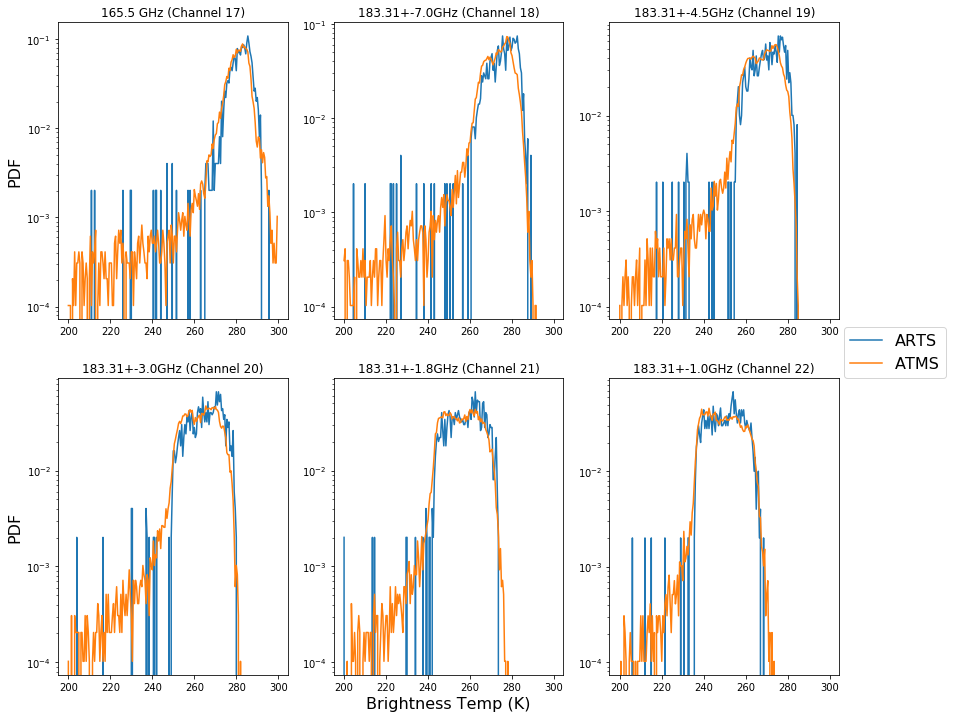

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(14, 12))
ij = 0
for i in range(2):
    for j in range(3):
        ax[i,j].plot( bins[:-1], hist_arts[ij])
        ax[i,j].plot( bins[:-1], hist_atms[ij])
        ij += 1


ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
ax[0,2].set_yscale('log')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,2].set_yscale('log')
    

ax[1,1].set_xlabel('Brightness Temp (K)', fontsize = 16)    
ax[0,0].set_ylabel('PDF', fontsize = 16)
ax[1,0].set_ylabel('PDF', fontsize = 16)

ax[0,0].set_title('165.5 GHz (Channel 17)')
ax[0,1].set_title('183.31+-7.0GHz (Channel 18)')    
ax[0,2].set_title('183.31+-4.5GHz (Channel 19)')
ax[1,0].set_title('183.31+-3.0GHz (Channel 20)')
ax[1,1].set_title('183.31+-1.8GHz (Channel 21)')
ax[1,2].set_title('183.31+-1.0GHz (Channel 22)')

ax[1,2].legend(['ARTS','ATMS'], bbox_to_anchor=(1.5, 1.2), prop={'size': 16})  

fig.savefig('arts_vs_atms_distributions_135.png')
